# Import and plot all the fit parameters vs temperature

<ErrorbarContainer object of 3 artists>

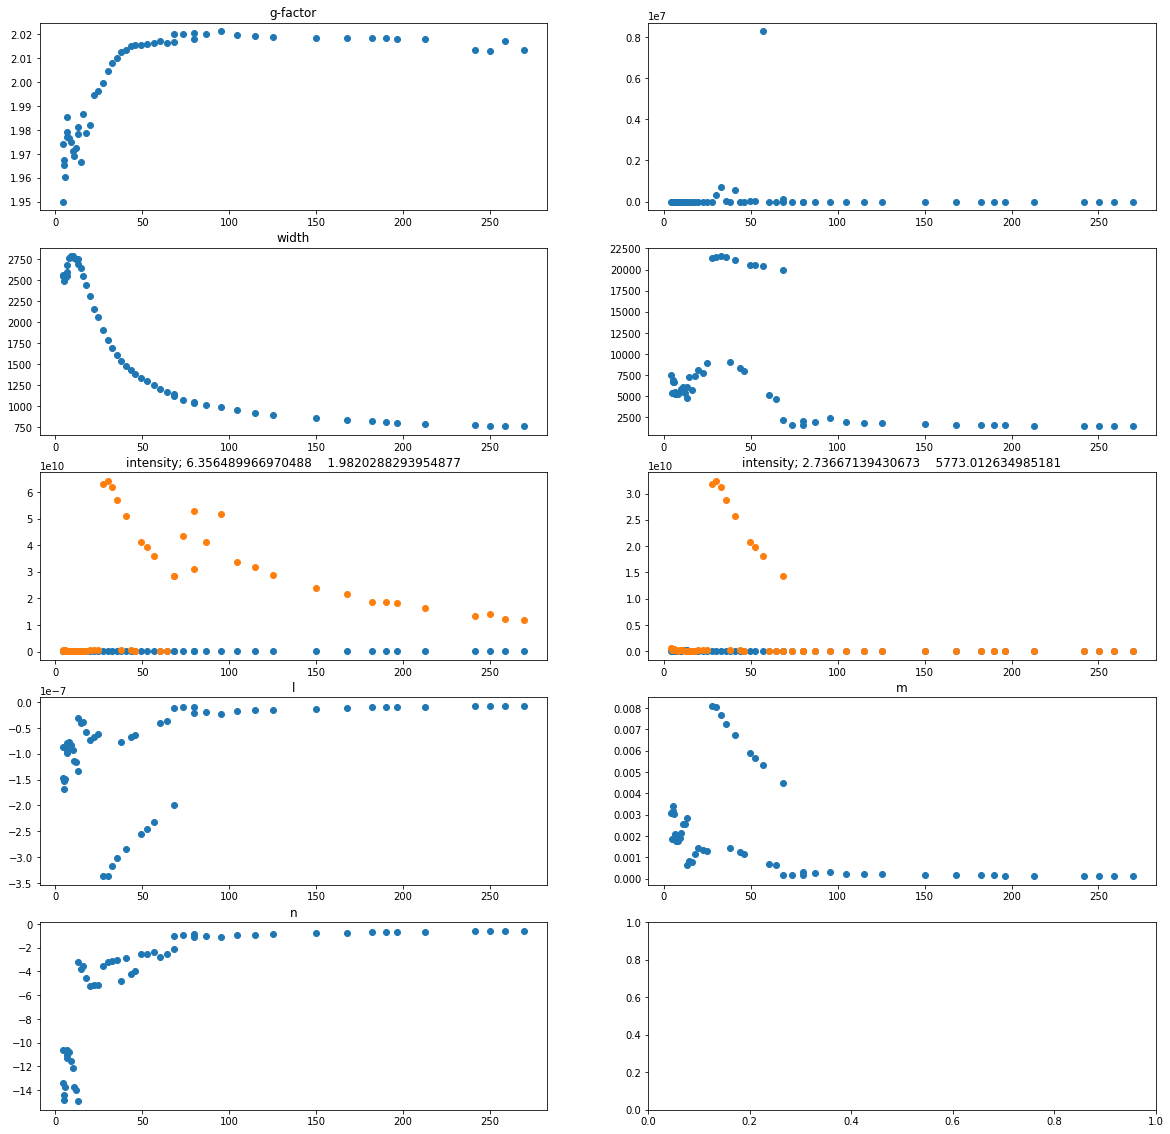

In [2]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
filename = folder+'\\python fits\\python_fit_results_whole_field_range.txt'




# list of the names of all the files in "folder" 
# files with different endings (.DTA, .dat, DSC, ...) all only appear once
files = [i[:-4] for i in os.listdir(folder) if i[-3:] == 'dat']

# extracts the temperature from the filename
# argument is just name of the file
def temperature (name):
    start = name.find('_')
    end = name.find('K')
    
    temp = name[start+1:end]
    if temp.find('p') == -1:
        temp_new = temp
    else:
        middle = temp.find('p')
        temp_new = temp[:middle] + '.' + temp[middle+1:]
    temp_new = str("%.1f" % float(temp_new))
    return temp_new+' K'
    

# extracts the freqeuncy from the .DSC file
# argument needs to be filename of .DSC file (icluding full path and .DSC ending)
def frequency (filename):
    f = open (filename, 'r')
    for line in f:
        if line[0:9] == 'Frequency':
            line = line.strip()
            line = line.split()
            frequency = line[1] + ' ' + line[2]
    return frequency


# none of the following important for any of the following procedure but makes it easier accessing individual files

# this routine sorts the filenames in "files" according to their temperatures
# and gives an array "temperatures" with the ordered temperatures
temperatures = []
for name in files:
    temp_new = temperature(name)[:-2]    
    temperatures.append(float(temp_new))

temperatures = np.array(temperatures)
files = np.array(files)

files = files[temperatures.argsort()]
temperatures = sorted(temperatures)





#T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, B03, dB03, gamma3, dgamma3, A3, dA3, l, dl, m, dm, n, dn, freq = data_import(filename, 3)
T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, l, dl, m, dm, n, dn, freq = data_import(filename, 3)

Tone, B0, dB0, gamma, dgamma, A, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(folder+'\\python fits\\initialguess.txt', 3)

##################################################################################
lower_limit = 0
upper_limit = 300
##################################################################################

mask = [all( [(lower_limit<T)[i], (T<upper_limit)[i]] ) for i in np.arange(len(T)) ]

fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20,20))

g1, g_err1 = [10000*freq/B01/13.98, 10000*freq*dB01/B01/B01/13.98]
g2, g_err2 = [10000*freq/B02/13.98, 10000*freq*dB02/B02/B02/13.98]
g, g_err = [10000*freq0/B0/13.98, 10000*freq0*dB0/B0/B0/13.98]

axes[0,0].set_title('g-factor')
axes[0,0].errorbar(T[mask], g1[mask], yerr = g_err1[mask], fmt = 'o')
axes[0,1].errorbar(T[mask], g2[mask], yerr = g_err2[mask], fmt = 'o')



#axes[0,1].errorbar(T[mask], g[mask], yerr = g_err[mask], fmt='o')
#axes[0].legend(['1st peak', '2nd peak', '3rd peak'])
#axes[0].set_ylim(1.9,2.05)


data1 = np.array([gamma1, dgamma1])
data2 = np.array([gamma2, dgamma2])
data3 = np.array([gamma, dgamma])

axes[1,0].set_title('width')
axes[1,0].errorbar(T[mask], data1[0, mask], yerr = data1[1, mask], fmt='o')
axes[1,1].errorbar(T[mask], data2[0, mask], yerr = data2[1, mask], fmt='o')

#axes[1].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])
#axes[1,1].errorbar(T[mask], data3[0, mask], yerr = data3[1, mask], fmt='o')



data1, err1 = rescale_A_Li( A1, dA1 )
data2, err2 = rescale_A_Li( A2, dA2 )

#data3, err3 = rescale_A_Li( np.array( [ [ i[0], i[1] ] for i in list(zip(A, dA)) ] ) )


axes[2,0].set_title('intensity; ' + str(A1[13]/A1[14]) + '    ' + str(A2[13]/A2[14]))
axes[2,0].errorbar(T[mask], data1[mask], yerr = err1[mask], fmt='o')
axes[2,0].errorbar(T[mask], data2[mask], yerr = err2[mask], fmt='o')

axes[2,1].set_title('intensity; ' + str(A1[34]/A1[35]) + '    ' + str(A2[34]/A2[35]))
axes[2,1].errorbar(T[mask], A1[mask], yerr = dA1[mask], fmt='o')
axes[2,1].errorbar(T[mask], A2[mask], yerr = dA2[mask], fmt='o')
#axes[2].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])



axes[3,0].set_title('l')
axes[3,0].errorbar(T[mask], l[mask], yerr = dl[mask], fmt='o')

axes[3,1].set_title('m')
axes[3,1].errorbar(T[mask], m[mask], yerr = dm[mask], fmt='o')

axes[4,0].set_title('n')
axes[4,0].errorbar(T[mask], n[mask], yerr = dn[mask], fmt='o')


#data1, err1 = rescale_A_Na( np.array( [ [ i[0], i[1] ] for i in list(zip(A3, dA3)) ] ) )
#data1 = np.array([10000*freq/B03/13.98, 10000*freq*dB03/B03/B03/13.98])
#data1 = np.array([A3, dA3])
#data1 = np.array([gamma3, dgamma3])
#axes[4,1].errorbar(T[mask], data1[mask], yerr = err1[mask], fmt='o')

# Plot individual data sets at certain temperatures

In [3]:
material = 'Li'

if material == 'Li':
    A3 = np.nan * np.zeros(len(T))


for index in np.arange(len(T)):
    
    field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)
    
    if np.isnan(A3[index]) == False:
        d1 = one_Lor(field, B01[index], A1[index], gamma1[index])
        d2 = one_Lor(field, B02[index], A2[index], gamma2[index])
        d3 = one_Lor(field, B03[index], A3[index], gamma3[index])
        dsum = d1 + d2 + d3
        background = l[index]*field*field+m[index]*field+n[index]
        
        data_minus_background = amp - background
        
        Temp = ('T = '+str(T[index])+' K')
        
        data = [field/10000, data_minus_background, dsum, d1, d2, d3, amp, background]
        names = ['B', 'X-ESR signal', 'sum of individual fits', 'fit 1', 'fit 2', 'fit 3', 'raw data', 'background']
        units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
        comments = [str(freq[index])+ ' GHz, ' + str(T[index])+' K', 'data', 'sum of fits', 
                    'L1', 'L2', 'L3', 'raw data', 'background']
        
               
    else:
        d1 = one_Lor(field, B01[index], A1[index], gamma1[index])
        d2 = one_Lor(field, B02[index], A2[index], gamma2[index])
        dsum = d1 + d2
        background = l[index]*field*field+m[index]*field+n[index]
        
        data_minus_background = amp - background
        
        Temp = ('T = '+str(T[index])+' K')
        
        data = [field/10000, data_minus_background, dsum, d1, d2, amp, background]
        names = ['B', 'X-ESR signal', 'sum of individual fits', 'fit 1', 'fit 2', 'raw data', 'background']
        units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
        comments = [str(freq[index])+ ' GHz, ' + str(T[index])+' K', 'data', 'sum of fits', 
                    'L1', 'L2', 'raw data', 'background']        
        
        
    save(data, names, units, comments, folder+'\\individual_fit_curves\\whole_field_range\\individual_fit_curves_'+str(T[index])+'_K.txt' )

In [15]:
files[6]

'LiCuFeVO3_6p6K'

In [16]:
index = 5
field, amp = data_import(folder+'\\'+files[index]+'_processed.txt', 3)



if np.isnan(A3[index]) == False:
    d1 = one_Lor(field, B01[index], A1[index], gamma1[index])
    d2 = one_Lor(field, B02[index], A2[index], gamma2[index])
    d3 = one_Lor(field, B03[index], A3[index], gamma3[index])
    dsum = d1 + d2 + d3
    background = l[index]*field*field+m[index]*field+n[index]
    
    data_minus_background = amp - background
    
    Temp = ('T = '+str(T[index])+' K')
    
    data = [field/10000, data_minus_background, dsum, d1, d2, d3, amp, background]
    names = ['B', 'X-ESR signal', 'sum of individual fits', 'fit 1', 'fit 2', 'fit 3', 'raw data', 'background']
    units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
    comments = [str(freq[index])+ ' GHz, ' + str(T[index])+' K', 'data', 'sum of fits', 'L1', 'L2', 'L3', 'raw data', 'background']
    
else:
    d1 = one_Lor(field, B01[index], A1[index], gamma1[index])
    d2 = one_Lor(field, B02[index], A2[index], gamma2[index])
    dsum = d1 + d2
    background = l[index]*field*field+m[index]*field+n[index]
    
    data_minus_background = amp - background
    Temp = ('T = '+str(T[index])+' K')
    data = [field/10000, data_minus_background, dsum, d1, d2, amp, background]
    names = ['B', 'X-ESR signal', 'sum of individual fits', 'fit 1', 'fit 2', 'raw data', 'background']
    units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
    comments = [str(freq[index])+ ' GHz, ' + str(T[index])+' K', 'data', 'sum of fits', 'L1', 'L2', 'raw data', 'background']
    
save(data, names, units, comments, folder+'\\individual_fit_curves\\whole_field_range\\individual_fit_curves_'+str(T[index])+'_K_different_exp_settings.txt' )